{'1111': 100}


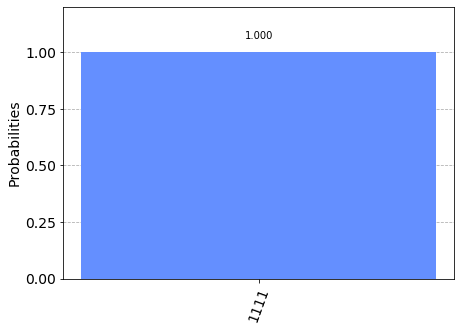

In [9]:
import qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np
%matplotlib inline


from qiskit.visualization import *
simulator = Aer.get_backend('qasm_simulator')

qi=QuantumRegister(8)
qb=QuantumRegister(2)
qo=QuantumRegister(3)
v=QuantumRegister(1)
c=ClassicalRegister(4)
circuit=QuantumCircuit(qi,qb,qo,v,c)

def fun_or(qc,q0,q1,q2):
    qc.x(q0)
    qc.x(q1)
    qc.ccx(q0,q1,q2)
    qc.x(q2)
    qc.x(q1)
    qc.x(q0)

def or_3(qc,q0,q1,q2,b,q3):
    fun_or(qc,q0,q1,b)
    fun_or(qc,b,q2,q3)
    qc.reset(b)

def or_4(qc,q0,q1,q2,q3,b1,b2,q4):
    or_3(qc,q0,q1,q2,b1,b2)
    fun_or (qc,b2,q3,q4)
    qc.reset(b1)
    qc.reset(b2)
    
circuit.x(qi[7])

or_4(circuit,qi[4],qi[5],qi[6],qi[7],qb[0],qb[1],qo[2])
or_4(circuit,qi[2],qi[3],qi[6],qi[7],qb[0],qb[1],qo[1])
or_4(circuit,qi[1],qi[5],qi[3],qi[7],qb[0],qb[1],qo[0])
or_4(circuit,qi[0],qo[0],qo[1],qo[2],qb[0],qb[1],v[0])


circuit.measure(v[0],c[3])
circuit.measure(qo[2],c[2])
circuit.measure(qo[1],c[1])
circuit.measure(qo[0],c[0])

job = execute(circuit,simulator,shots=100)
result=job.result()
counts = result.get_counts(circuit)

print(counts)

plot_histogram(counts)
    
 


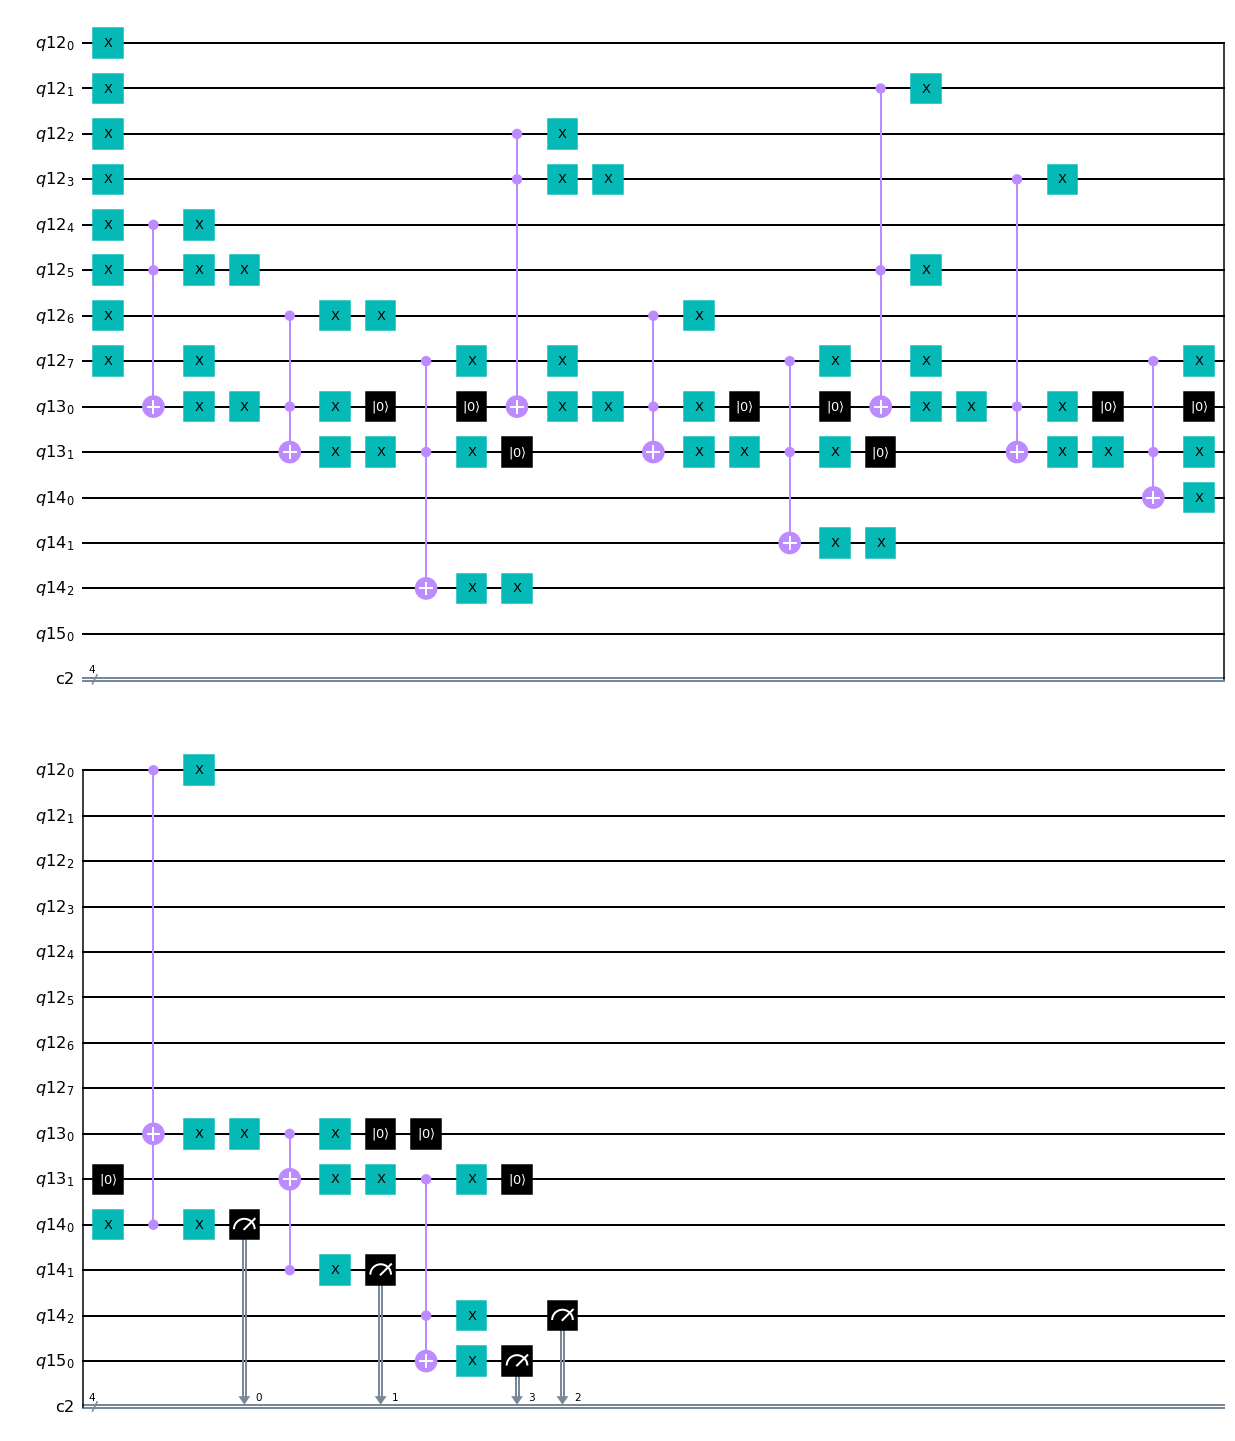

In [10]:
circuit.draw(output='mpl')